In [3]:
!pip install datasets
!pip install transformers
!pip install numpy
!pip install evaluate
!pip install tensorflow

# Train a TensorFlow model with Keras
You can also train 🤗 Transformers models in TensorFlow with the Keras API!

## Loading data for Keras
When you want to train a 🤗 Transformers model with the Keras API, you need to convert your dataset to a format that Keras understands. If your dataset is small, you can just convert the whole thing to NumPy arrays and pass it to Keras. Let’s try that first before we do anything more complicated.

First, load a dataset. We’ll use the CoLA dataset from the GLUE benchmark, since it’s a simple binary text classification task, and just take the training split for now.


In [1]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos IMDB Movie Review con una división específica
dataset = load_dataset("imdb", split="train[:1000]")  # Cargar las primeras 1000 instancias del conjunto de entrenamiento

# Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%)
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)

# Ahora puedes utilizar estos conjuntos de datos en tu modelo
# import pandas as pd
# import tensorflow as tf

# # Leer el archivo CSV y eliminar filas con valores NaN
# df = pd.read_csv("/content/diseases_articles.csv")
# df = df.dropna()

# # Dividir en entrenamiento (80%) y prueba (20%)
# dataset_train, dataset_test = train_test_split(df, test_size=0.2, random_state=42)

# # Dividir el conjunto de entrenamiento en entrenamiento (75%) y validación (25%)
# dataset_train, dataset_validation = train_test_split(dataset_train, test_size=0.25, random_state=42)

# # Convertir los DataFrames a conjuntos de datos de TensorFlow/Keras
# dataset_train = tf.data.Dataset.from_tensor_slices((dataset_train['Sentence'].values, dataset_train['Disease Name'].values))
# dataset_validation = tf.data.Dataset.from_tensor_slices((dataset_validation['Sentence'].values, dataset_validation['Disease Name'].values))
# dataset_test = tf.data.Dataset.from_tensor_slices((dataset_test['Sentence'].values, dataset_test['Disease Name'].values))

# # Ahora puedes usar estos conjuntos de datos en tu modelo de TensorFlow/Keras


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:

dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 1000
})

Next, load a tokenizer and tokenize the data as NumPy arrays. Note that the labels are already a list of 0 and 1s, so we can just convert that directly to a NumPy array without tokenization!

In [3]:
from transformers import AutoTokenizer
import numpy as np
#tokenirizamos training
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")
tokenized_data = tokenizer(dataset_train["text"], return_tensors="np", padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data_train = dict(tokenized_data)

labels_train = np.array(dataset_train["label"])  # Label is already an array of 0 and 1

#tokenirizamos test
tokenized_data = tokenizer(dataset_test["text"], return_tensors="np", padding=True)
# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data_test = dict(tokenized_data)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (1564 > 512). Running this sequence through the model will result in indexing errors


Finally, load, compile, and fit the model. Note that Transformers models all have a default task-relevant loss function, so you don’t need to specify one unless you want to:

In [6]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Load and compile our model
model = TFAutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased")
# Lower learning rates are often better for fine-tuning transformers
model.compile()  # No loss argument!

model.fit(tokenized_data_train, labels_train)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ResourceExhaustedError: Graph execution error:

Detected at node tf_bert_for_sequence_classification_1/bert/encoder/layer_._0/attention/self/dropout_39/dropout/random_uniform/RandomUniform defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-6-e62ab28ab23b>", line 9, in <cell line: 9>

  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1229, in fit

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1804, in fit

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step

  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1669, in train_step

  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1672, in train_step

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 588, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1738, in run_call_with_unpacked_inputs

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 1750, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/modeling_tf_utils.py", line 1738, in run_call_with_unpacked_inputs

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 973, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 607, in call

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 613, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 506, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 390, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/transformers/models/bert/modeling_tf_bert.py", line 307, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 553, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py", line 558, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1047, in __call__

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/base_layer.py", line 1136, in __call__

  File "/tmp/__autograph_generated_filep5_3jmgq.py", line 34, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/layers/regularization/dropout.py", line 109, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/layers/regularization/dropout.py", line 120, in call

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/control_flow_util.py", line 106, in smart_cond

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/utils/control_flow_util.py", line 109, in smart_cond

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/layers/regularization/dropout.py", line 117, in dropped_inputs

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/backend.py", line 2157, in dropout

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/backend.py", line 2164, in dropout

  File "/usr/local/lib/python3.10/dist-packages/tf_keras/src/backend.py", line 2176, in dropout

OOM when allocating tensor with shape[32,12,1564,1564] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node tf_bert_for_sequence_classification_1/bert/encoder/layer_._0/attention/self/dropout_39/dropout/random_uniform/RandomUniform}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_38234]

In [15]:
!pip install keras

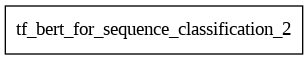

In [16]:
import keras
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [5]:
test_scores = model.evaluate(tokenized_data_test, labels_test, verbose=2)


NameError: name 'labels_test' is not defined

In [30]:
predicciones=model.predict(tokenized_data_test)


34/34 [==============================] - 3s 97ms/step


In [38]:
dataset_test["label"]

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
